In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#checking null
for col in df.columns:
  pct_miss = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_miss))
  #almost all columns has missing values

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
#check NULL in numeric columns
df.select_dtypes(include=np.number).isnull().sum()

year          0
score         3
votes         3
budget     2171
gross       189
runtime       4
dtype: int64

In [ ]:
#filling NULL numeric columns with mean values
mean_score = df['score'].mean()
mean_votes = df['votes'].mean()
mean_budget = df['budget'].mean()
mean_gross = df['gross'].mean()
mean_runtime = df['runtime'].mean()

In [ ]:
df['score'] = df['score'].fillna(mean_score)
df['votes'] = df['votes'].fillna(mean_votes)
df['budget'] = df['budget'].fillna(mean_budget)
df['gross'] = df['gross'].fillna(mean_gross)
df['runtime'] = df['runtime'].fillna(mean_runtime)

In [ ]:
df.select_dtypes(include=np.number).isnull().sum()

year       0
score      0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

In [ ]:
#check NULL in object columns
df.select_dtypes(include=np.object).isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


name         0
rating      77
genre        0
released     2
director     0
writer       3
star         1
country      3
company     17
dtype: int64

In [ ]:
#filling NA non numeric columns with most frequent values
df['rating'].value_counts()
df['released'].value_counts()
df['writer'].value_counts()
df['star'].value_counts()
df['country'].value_counts()
df['company'].value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
Tim Burton Productions        1
PK 65 Films                   1
Name: company, Length: 2385, dtype: int64

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].value_counts().index[0])
df['released'] = df['released'].fillna(df['released'].value_counts().index[0])
df['writer'] = df['writer'].fillna(df['writer'].value_counts().index[0])
df['star'] = df['star'].fillna(df['star'].value_counts().index[0])
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df['company'] = df['company'].fillna(df['company'].value_counts().index[0])

In [ ]:
df.select_dtypes(include=np.object).isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [ ]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#convert votes, budget, & gross to integer
df[['votes','budget','gross']] = df[['votes','budget','gross']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 898.7+ KB


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


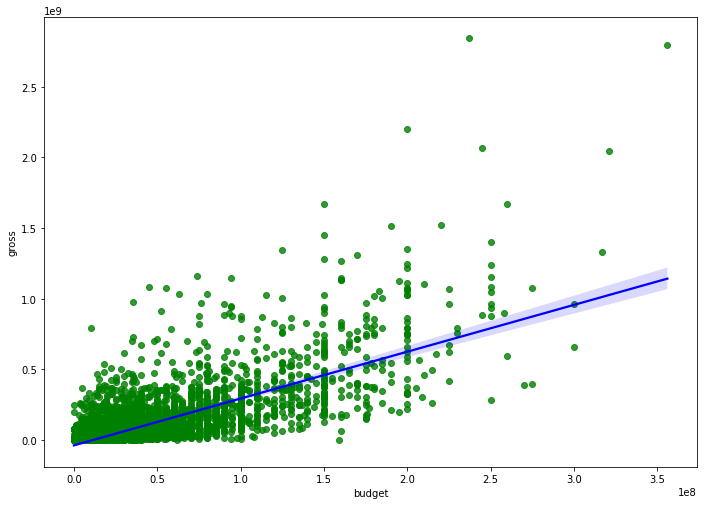

In [ ]:
#plotting correlation budget vs gross
matplotlib.rcParams['figure.figsize'] = 11.7,8.27
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color':'blue'})

In [ ]:
#Correlation of numeric column
corr_mov = df.corr()
corr_mov

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


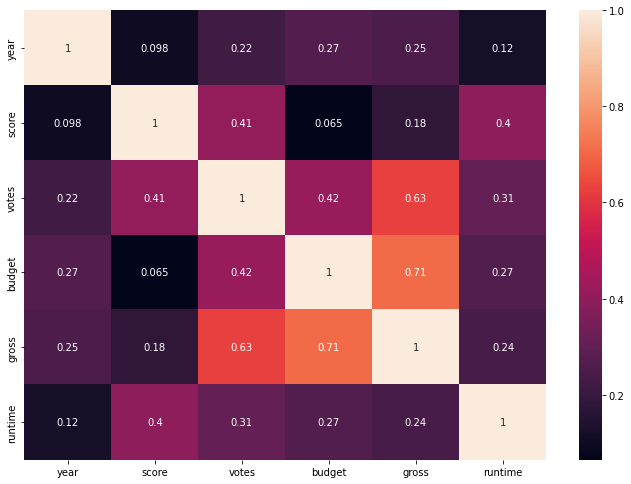

In [ ]:
sns.heatmap(corr_mov, annot=True)

In [58]:
#Let's include numerize the 'object' column
df_num = df

for col in df_num.columns:
  if(df_num[col].dtypes == 'object'):
    df_num[col] = df_num[col].astype('category')
    df_num[col] = df_num[col].cat.codes

df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.400000,927000,2589,4014,1047,54,19000000,46998772,2319,146.000000
1,5573,6,1,1980,1492,5.800000,65000,2269,1632,327,55,4500000,58853106,731,104.000000
2,5142,4,0,1980,1771,8.700000,1200000,1111,2567,1745,55,18000000,538375067,1540,124.000000
3,286,4,4,1980,1492,7.700000,221000,1301,2000,2246,55,3500000,83453539,1812,88.000000
4,1027,6,4,1980,1543,7.300000,108000,1054,521,410,55,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,2964,3.100000,18,1500,2289,2421,55,7000,78500541,2281,90.000000
7664,1678,6,4,2020,1107,4.700000,36,774,2614,1886,55,35589876,78500541,539,90.000000
7665,4717,6,6,2020,193,5.700000,29,2061,2683,2040,55,58750,78500541,941,107.261613
7666,2843,6,6,2020,2817,6.390411,88108,1184,1824,450,55,15000,78500541,2281,120.000000


In [60]:
df_num_corr = df_num.corr()
df_num_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017095,0.013086,0.009079,0.010018,0.006749,-0.010425,0.020368,0.005466,0.010369,0.010390
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013246,0.012378,0.016255,-0.002795,0.005314,0.026930,-0.156544,-0.130083,-0.079626,0.066641
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.310566,-0.230267,-0.070013,-0.052699
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.097936,0.222810,-0.020795,-0.007901,-0.027745,-0.069423,0.265578,0.252042,-0.011438,0.120766
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042617,0.016114,-0.001492,-0.003461,0.015550,-0.022042,0.012267,0.001637,-0.008443,0.000867
score,0.017095,0.013246,0.027959,0.097936,0.042617,1.000000,0.409182,0.009559,0.019795,-0.000979,-0.134577,0.064541,0.182868,-0.004594,0.399329
votes,0.013086,0.012378,-0.145276,0.222810,0.016114,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,0.130638,0.309166
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009559,0.000260,1.000000,0.299512,0.039715,0.017926,-0.010364,-0.014272,0.004250,0.017624
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019795,0.000232,0.299512,1.000000,0.028745,0.014409,-0.033217,-0.023186,0.001665,-0.003698
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.008072,0.009273


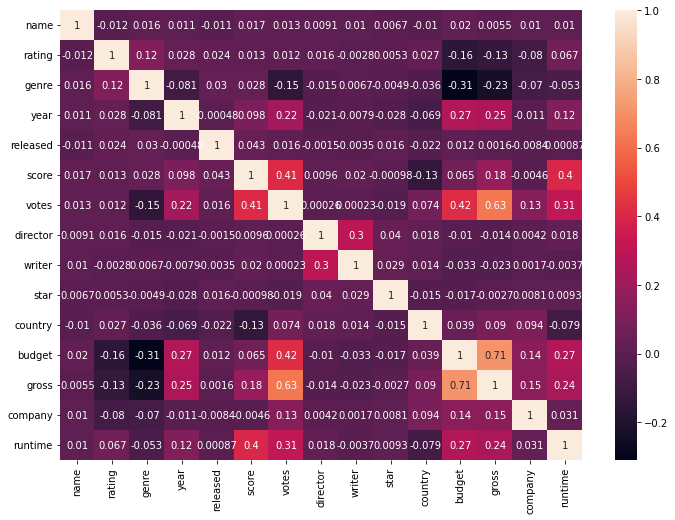

In [61]:
sns.heatmap(df_num_corr, annot=True)

In [ ]:
#The results is still the same, only budget and votes has hight correlation with gross